In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data

data = pd.read_csv('german_credit_data.csv')

In [3]:
# dataframe exploration

data.shape

(1000, 11)

In [4]:
data.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


first column seems to be unwanted, as it is similar to the index, so lets drop that column.

In [3]:
del data['Unnamed: 0']

In [6]:
data.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [7]:
# lets findout some more relative information about datas 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Now it's clear that we have two datatypes in our dataframe, 4 columns with int64 datatype and 6 columns with object datatype,
also its clearly visible that "Saving accounts" & "Checking account" columns have 183 & 394 missing values respectively.

In [9]:
# lets explore some statistical details

data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


From above result we can say that data is not balanced as out of 1000 records of target variable 700 belongs to one category "good". Also Credit amount data is +ve skewed.

In [10]:
# lets find out some relationship 

In [11]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


for the moment we can say that there is a +ve relation between "Credit amount" and "Duration" columns.
we will dig deeper into this again, after we made few changes.

In [12]:
# lets try to find out Relation/Pattern of Independent variable with Target varible

Before that lets divide Age into bins

In [3]:
data['Age_group'] = pd.qcut(data.Age, q=4)

In [14]:
data['Age_group'].value_counts()

(18.999, 27.0]    291
(33.0, 42.0]      249
(42.0, 75.0]      235
(27.0, 33.0]      225
Name: Age_group, dtype: int64

In [15]:
# we will use crosstab, pivot table and plot method to find the insight

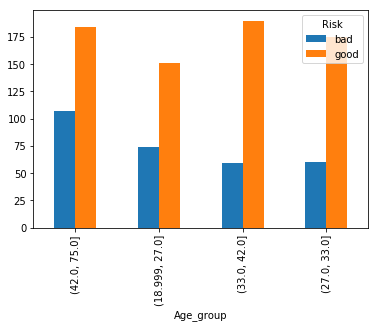

In [16]:
pd.crosstab(data['Age_group'], data.Risk).plot(kind='bar')
plt.show()

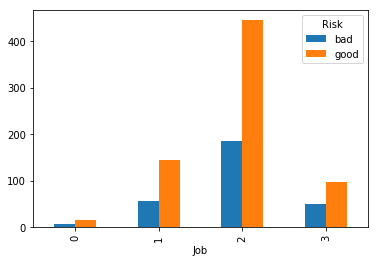

In [18]:
pd.crosstab(data.Job, data.Risk).plot(kind='bar')
plt.show()

from the above graph, we can say that Person from job category 2 tends to have more loan compare than the others.

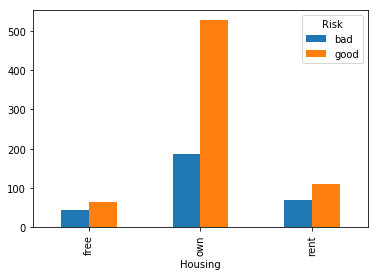

In [19]:
pd.crosstab(data.Housing, data.Risk).plot(kind='bar')
plt.show()

from the above graph, we can say that Person having "own housing" have more loans compare to others, also person from "free housing" group has comparitibly more defaulter ration then others.

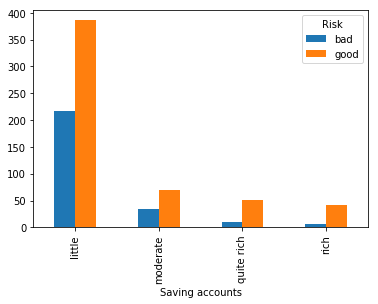

In [20]:
pd.crosstab(data['Saving accounts'], data.Risk).plot(kind='bar')
plt.show()

from the above graph we can say that Person having "little" Saving accounts have more loan, whereas "rich" have the minimun loan

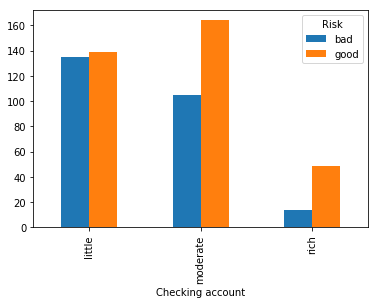

In [21]:
pd.crosstab(data['Checking account'], data.Risk).plot(kind='bar')
plt.show()

from the above graph, we can say that "little" checking account group has more default ratio whereas "rich" checking account has minimum default ratio.

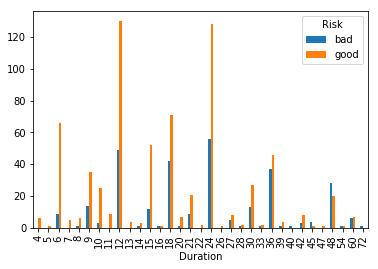

In [22]:
pd.crosstab(data.Duration, data.Risk).plot(kind='bar')
plt.show()

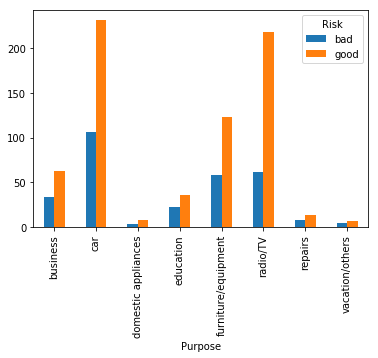

In [23]:
pd.crosstab(data.Purpose, data.Risk).plot(kind='bar')
plt.show()

from the above graph, it seems that max no of loan is taken for Car purchasing.

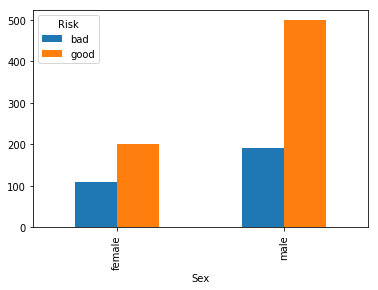

In [24]:
pd.crosstab(data.Sex,data.Risk).plot(kind='bar')
plt.show()

from the above graph, it seems default ratio is more in female category compared to male.

After above analysis, we found some relationship like Job category 2, Saving accounts and checking asccount group "little" has something to do. 
To make picture more clear let's do some more analysis.

In [35]:
piv_table = pd.pivot_table(data, index = ['Sex', 'Age_group'], columns= 'Risk', values = 'Saving accounts' , aggfunc= len,
                           fill_value=0)
piv_table

Risk                   bad  good
Sex    Age_group                
female (42.0, 75.0]     58    81
       (18.999, 27.0]   27    39
       (33.0, 42.0]     13    36
       (27.0, 33.0]     11    45
male   (42.0, 75.0]     49   103
       (18.999, 27.0]   47   112
       (33.0, 42.0]     46   154
       (27.0, 33.0]     49   130

its clear that female has more defaulter ratio then the male.    
bad/good for female = 0.54,    
bad/good for male = 0.38.

In [4]:
map_value = {'good':1, 'bad':0}

In [53]:
pd.crosstab(data.Job,data['Checking account'], values = data.Risk.map(map_value), aggfunc=len)

Checking account,little,moderate,rich
Job,,,
0,6,9,4
1,59,57,14
2,172,155,37
3,37,48,8


out of three categories "little", "moderate" & "rich", Job category 2 seems to have maxium no of loan takers.

In [43]:
print('Defaulter of Job Category 0/Checking account-little :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Job Category 0/Checking account-moderate :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Job Category 0/Checking account-rich :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Job Category 0/Checking account-little : 4
Defaulter of Job Category 0/Checking account-moderate : 2
Defaulter of Job Category 0/Checking account-rich : 1


In [44]:
print('Defaulter of Job Category 1/Checking account-little :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Job Category 1/Checking account-moderate :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Job Category 1/Checking account-rich :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Job Category 1/Checking account-little : 23
Defaulter of Job Category 1/Checking account-moderate : 19
Defaulter of Job Category 1/Checking account-rich : 5


In [45]:
print('Defaulter of Job Category 2/Checking account-little :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Job Category 2/Checking account-moderate :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Job Category 2/Checking account-rich :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Job Category 2/Checking account-little : 96
Defaulter of Job Category 2/Checking account-moderate : 57
Defaulter of Job Category 2/Checking account-rich : 6


In [46]:
print('Defaulter of Job Category 3/Checking account-little :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Job Category 3/Checking account-moderate :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Job Category 3/Checking account-rich :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Job Category 3/Checking account-little : 12
Defaulter of Job Category 3/Checking account-moderate : 27
Defaulter of Job Category 3/Checking account-rich : 2


In [54]:
pd.crosstab(data.Risk,data['Checking account'], values = data.Job, aggfunc=len)

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


out of three categories "little", "moderate" & "rich", "little" has maximum default ratio of 0.97 then "moderate" with 0.64 and
"rich" with minimum value of 0.28

In [55]:
pd.crosstab(data.Risk,data.Job, values = data['Checking account'], aggfunc=len)

Job,0,1,2,3
Risk,,,,
bad,7,56,186,51
good,15,144,444,97


In [57]:
pd.crosstab(data.Job,data['Saving accounts'], values = data.Risk.map(map_value), aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Job,,,,
0,13.0,NaN,3.0,1.0
1,128.0,23.0,12.0,8.0
2,366.0,66.0,42.0,36.0
3,96.0,14.0,6.0,3.0


In [47]:
print('Defaulter of Job Category 0/Saving accounts-little :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Job Category 0/Sacing accounts-moderate :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Job Category 0/Sacing accounts-quite rich :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Job Category 0/Saving accounts-rich :',len(data[(data['Job']==0) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Job Category 0/Saving accounts-little : 6
Defaulter of Job Category 0/Sacing accounts-moderate : 0
Defaulter of Job Category 0/Sacing accounts-quite rich : 0
Defaulter of Job Category 0/Saving accounts-rich : 0


In [48]:
print('Defaulter of Job Category 0/Saving accounts-little :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Job Category 0/Sacing accounts-moderate :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Job Category 0/Sacing accounts-quite rich :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Job Category 0/Saving accounts-rich :',len(data[(data['Job']==1) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Job Category 0/Saving accounts-little : 39
Defaulter of Job Category 0/Sacing accounts-moderate : 9
Defaulter of Job Category 0/Sacing accounts-quite rich : 4
Defaulter of Job Category 0/Saving accounts-rich : 0


In [49]:
print('Defaulter of Job Category 0/Saving accounts-little :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Job Category 0/Sacing accounts-moderate :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Job Category 0/Sacing accounts-quite rich :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Job Category 0/Saving accounts-rich :',len(data[(data['Job']==2) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Job Category 0/Saving accounts-little : 135
Defaulter of Job Category 0/Sacing accounts-moderate : 18
Defaulter of Job Category 0/Sacing accounts-quite rich : 7
Defaulter of Job Category 0/Saving accounts-rich : 5


In [50]:
print('Defaulter of Job Category 3/Saving accounts-little :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Job Category 3/Sacing accounts-moderate :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Job Category 3/Sacing accounts-quite rich :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Job Category 3/Saving accounts-rich :',len(data[(data['Job']==3) & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Job Category 3/Saving accounts-little : 37
Defaulter of Job Category 3/Sacing accounts-moderate : 7
Defaulter of Job Category 3/Sacing accounts-quite rich : 0
Defaulter of Job Category 3/Saving accounts-rich : 1


In [58]:
pd.crosstab(data.Risk,data['Saving accounts'], values = data.Job, aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [59]:
pd.crosstab(data.Risk,data.Job, values = data['Saving accounts'], aggfunc=len)

Job,0,1,2,3
Risk,,,,
bad,7,56,186,51
good,15,144,444,97


In [60]:
pd.crosstab(data.Housing,data['Saving accounts'], values = data.Risk.map(map_value), aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Housing,,,,
free,67,10,6,2
own,430,71,45,37
rent,106,22,12,9


In [51]:
print('Defaulter of Housing Category- free/Saving accounts-little :',len(data[(data['Housing']=='free') & (data['Risk']=='bad')
                                                                              &( data['Saving accounts']=='little')]))
print('Defaulter of Housing Category- free/Sacing accounts-moderate :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                                & (data['Saving accounts']=='moderate')]))
print('Defaulter of Housing Category- free/Sacing accounts-quite rich :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                                  & (data['Saving accounts']=='quite rich')]))
print('Defaulter of Housing Category- free/Saving accounts-rich :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Saving accounts']=='rich')]))

Defaulter of Housing Category- free/Saving accounts-little : 30
Defaulter of Housing Category- free/Sacing accounts-moderate : 5
Defaulter of Housing Category- free/Sacing accounts-quite rich : 2
Defaulter of Housing Category- free/Saving accounts-rich : 2


In [52]:
print('Defaulter of Housing Category- own/Saving accounts-little :',len(data[(data['Housing']=='own') & (data['Risk']=='bad')
                                                                              &( data['Saving accounts']=='little')]))
print('Defaulter of Housing Category- own/Sacing accounts-moderate :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                                & (data['Saving accounts']=='moderate')]))
print('Defaulter of Housing Category- own/Sacing accounts-quite rich :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                                  & (data['Saving accounts']=='quite rich')]))
print('Defaulter of Housing Category- own/Saving accounts-rich :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Saving accounts']=='rich')]))

Defaulter of Housing Category- own/Saving accounts-little : 136
Defaulter of Housing Category- own/Sacing accounts-moderate : 19
Defaulter of Housing Category- own/Sacing accounts-quite rich : 7
Defaulter of Housing Category- own/Saving accounts-rich : 3


In [53]:
print('Defaulter of Housing Category- rent/Saving accounts-little :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad')
                                                                              &( data['Saving accounts']=='little')]))
print('Defaulter of Housing Category- rent/Sacing accounts-moderate :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                                & (data['Saving accounts']=='moderate')]))
print('Defaulter of Housing Category- rent/Sacing accounts-quite rich :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                                  & (data['Saving accounts']=='quite rich')]))
print('Defaulter of Housing Category- rent/Saving accounts-rich :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Saving accounts']=='rich')]))

Defaulter of Housing Category- rent/Saving accounts-little : 51
Defaulter of Housing Category- rent/Sacing accounts-moderate : 10
Defaulter of Housing Category- rent/Sacing accounts-quite rich : 2
Defaulter of Housing Category- rent/Saving accounts-rich : 1


In [61]:
pd.crosstab(data.Risk,data['Saving accounts'], values = data.Housing, aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [63]:
pd.crosstab(data.Risk,data.Housing, values = data['Saving accounts'], aggfunc=len)

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


In [8]:
pd.crosstab(data.Housing,data['Checking account'], values = data.Risk.map(map_value), aggfunc=len)

Checking account,little,moderate,rich
Housing,,,
free,39,29,8
own,170,192,47
rent,65,48,8


In [54]:
print('Defaulter of Housing Category- free/Checking accounts-little :',len(data[(data['Housing']=='free') & (data['Risk']=='bad')
                                                                              &( data['Checking account']=='little')]))
print('Defaulter of Housing Category- free/Checking accounts-moderate :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                                & (data['Checking account']=='moderate')]))
print('Defaulter of Housing Category- free/Checking accounts-rich :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Checking account']=='rich')]))

Defaulter of Housing Category- free/Checking accounts-little : 21
Defaulter of Housing Category- free/Checking accounts-moderate : 16
Defaulter of Housing Category- free/Checking accounts-rich : 3


In [55]:
print('Defaulter of Housing Category- own/Checking accounts-little :',len(data[(data['Housing']=='own') & (data['Risk']=='bad')
                                                                              &( data['Checking account']=='little')]))
print('Defaulter of Housing Category- own/Checking accounts-moderate :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                                & (data['Checking account']=='moderate')]))
print('Defaulter of Housing Category- own/Checking accounts-rich :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Checking account']=='rich')]))

Defaulter of Housing Category- own/Checking accounts-little : 78
Defaulter of Housing Category- own/Checking accounts-moderate : 66
Defaulter of Housing Category- own/Checking accounts-rich : 10


In [56]:
print('Defaulter of Housing Category- rent/Checking accounts-little :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad')
                                                                              &( data['Checking account']=='little')]))
print('Defaulter of Housing Category- rent/Checking accounts-moderate :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                                & (data['Checking account']=='moderate')]))
print('Defaulter of Housing Category- rent/Checking accounts-rich :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Checking account']=='rich')]))

Defaulter of Housing Category- rent/Checking accounts-little : 36
Defaulter of Housing Category- rent/Checking accounts-moderate : 23
Defaulter of Housing Category- rent/Checking accounts-rich : 1


In [9]:
pd.crosstab(data.Risk,data['Checking account'], values = data.Housing, aggfunc=len)

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [6]:
pd.crosstab(data.Risk,data.Housing, values = data['Checking account'], aggfunc=len)

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


In [10]:
pd.crosstab(data.Sex,data['Checking account'], values = data.Risk.map(map_value), aggfunc=len)

Checking account,little,moderate,rich
Sex,,,
female,88,86,20
male,186,183,43


In [57]:
print('Defaulter of Sex Category female/Checking account-little :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Sex Category female/Checking account-moderate :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Sex Category female/Checking account-rich :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Sex Category female/Checking account-little : 46
Defaulter of Sex Category female/Checking account-moderate : 41
Defaulter of Sex Category female/Checking account-rich : 4


In [58]:
print('Defaulter of Sex Category male/Checking account-little :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Sex Category male/Checking account-moderate :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Sex Category male/Checking account-rich :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Sex Category male/Checking account-little : 89
Defaulter of Sex Category male/Checking account-moderate : 64
Defaulter of Sex Category male/Checking account-rich : 10


In [11]:
pd.crosstab(data.Risk,data['Checking account'], values = data.Sex, aggfunc=len)

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [12]:
pd.crosstab(data.Risk,data.Sex, values = data['Checking account'], aggfunc=len)

Sex,female,male
Risk,,
bad,109,191
good,201,499


In [13]:
pd.crosstab(data.Sex,data['Saving accounts'], values = data.Risk.map(map_value), aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Sex,,,,
female,194,32,16,19
male,409,71,47,29


In [61]:
print('Defaulter of Sex Category female/Saving account-little :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Sex Category female/Saving account-moderate :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Sex Category female/Saving account-q rich :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Sex Category female/Savking account-rich :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Sex Category female/Saving account-little : 76
Defaulter of Sex Category female/Saving account-moderate : 15
Defaulter of Sex Category female/Saving account-q rich : 4
Defaulter of Sex Category female/Savking account-rich : 1


In [62]:
print('Defaulter of Sex Category male/Saving account-little :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Sex Category male/Saing account-moderate :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Sex Category male/Saving account-q rich :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Sex Category male/Saving account-rich :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Sex Category male/Saving account-little : 141
Defaulter of Sex Category male/Saing account-moderate : 19
Defaulter of Sex Category male/Saving account-q rich : 7
Defaulter of Sex Category male/Saving account-rich : 5


In [14]:
pd.crosstab(data.Risk,data['Saving accounts'], values = data.Sex, aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [16]:
pd.crosstab(data.Risk,data.Sex, values = data['Saving accounts'], aggfunc=len)

Sex,female,male
Risk,,
bad,109,191
good,201,499


In [63]:
pd.crosstab(data.Purpose, data['Saving accounts'],values = data.Risk.map(map_value), aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Purpose,,,,
business,56.0,17.0,4.0,6.0
car,188.0,39.0,18.0,18.0
domestic appliances,6.0,1.0,2.0,NaN
education,34.0,5.0,3.0,2.0
furniture/equipment,128.0,9.0,12.0,11.0
radio/TV,169.0,27.0,23.0,9.0
repairs,14.0,3.0,1.0,2.0
vacation/others,8.0,2.0,NaN,NaN


In [66]:
print('Defaulter of Purpose Category business/Saving account-little :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category business/Saing account-moderate :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category business/Saving account-q rich :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category business/Saving account-rich :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category business/Saving account-little : 27
Defaulter of Purpose Category business/Saing account-moderate : 3
Defaulter of Purpose Category business/Saving account-q rich : 1
Defaulter of Purpose Category business/Saving account-rich : 1


In [67]:
print('Defaulter of Purpose Category car/Saving account-little :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category car/Saing account-moderate :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category car/Saving account-q rich :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category car/Saving account-rich :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category car/Saving account-little : 73
Defaulter of Purpose Category car/Saing account-moderate : 12
Defaulter of Purpose Category car/Saving account-q rich : 4
Defaulter of Purpose Category car/Saving account-rich : 0


In [68]:
print('Defaulter of Purpose Category d appliances/Saving account-little :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category d appliances/Saing account-moderate :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category d appliances/Saving account-q rich :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category d appliances/Saving account-rich :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category d appliances/Saving account-little : 2
Defaulter of Purpose Category d appliances/Saing account-moderate : 1
Defaulter of Purpose Category d appliances/Saving account-q rich : 0
Defaulter of Purpose Category d appliances/Saving account-rich : 0


In [69]:
print('Defaulter of Purpose Category education/Saving account-little :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category education/Saing account-moderate :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category education/Saving account-q rich :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category education/Saving account-rich :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category education/Saving account-little : 17
Defaulter of Purpose Category education/Saing account-moderate : 3
Defaulter of Purpose Category education/Saving account-q rich : 0
Defaulter of Purpose Category education/Saving account-rich : 2


In [70]:
print('Defaulter of Purpose Category furniture-equipment/Saving account-little :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category furniture-equipment/Saing account-moderate :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category furniture-equipment/Saving account-q rich :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category furniture-equipment/Saving account-rich :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category furniture-equipment/Saving account-little : 47
Defaulter of Purpose Category furniture-equipment/Saing account-moderate : 4
Defaulter of Purpose Category furniture-equipment/Saving account-q rich : 3
Defaulter of Purpose Category furniture-equipment/Saving account-rich : 0


In [71]:
print('Defaulter of Purpose Category radio-TV/Saving account-little :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category radio-TV/Saing account-moderate :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category radio-TV/Saving account-q rich :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category radio-TV/Saving account-rich :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category radio-TV/Saving account-little : 42
Defaulter of Purpose Category radio-TV/Saing account-moderate : 10
Defaulter of Purpose Category radio-TV/Saving account-q rich : 3
Defaulter of Purpose Category radio-TV/Saving account-rich : 1


In [72]:
print('Defaulter of Purpose Category repairs/Saving account-little :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category repairs/Saing account-moderate :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category repairs/Saving account-q rich :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category repairs/Saving account-rich :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category repairs/Saving account-little : 6
Defaulter of Purpose Category repairs/Saing account-moderate : 0
Defaulter of Purpose Category repairs/Saving account-q rich : 0
Defaulter of Purpose Category repairs/Saving account-rich : 2


In [73]:
print('Defaulter of Purpose Category vacation/Saving account-little :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='little')]))
print('Defaulter of Purpose Category vacation/Saing account-moderate :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='moderate')]))
print('Defaulter of Purpose Category vacation/Saving account-q rich :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='quite rich')]))
print('Defaulter of Purpose Category vacation/Saving account-rich :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Saving accounts']=='rich')]))

Defaulter of Purpose Category vacation/Saving account-little : 3
Defaulter of Purpose Category vacation/Saing account-moderate : 1
Defaulter of Purpose Category vacation/Saving account-q rich : 0
Defaulter of Purpose Category vacation/Saving account-rich : 0


In [64]:
pd.crosstab(data.Risk,data['Saving accounts'], values = data.Purpose, aggfunc=len)

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [65]:
pd.crosstab(data.Risk,data.Purpose, values = data['Saving accounts'], aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


In [5]:
pd.crosstab(data.Purpose, data['Checking account'],values = data.Risk.map(map_value), aggfunc=len)

Checking account,little,moderate,rich
Purpose,,,
business,15.0,40.0,5.0
car,104.0,81.0,18.0
domestic appliances,5.0,2.0,1.0
education,15.0,16.0,4.0
furniture/equipment,72.0,39.0,11.0
radio/TV,54.0,75.0,24.0
repairs,5.0,9.0,NaN
vacation/others,4.0,7.0,NaN


In [8]:
print('Defaulter of Purpose Category business/Checking account-little :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category business/Checking account-moderate :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category business/Checking account-rich :',len(data[(data['Purpose']=='business') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category business/Checking account-little : 8
Defaulter of Purpose Category business/Checking account-moderate : 14
Defaulter of Purpose Category business/Checking account-rich : 2


In [80]:
print('Defaulter of Purpose Category car/Checking account-little :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category car/Checking account-moderate :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category car/Checking account-rich :',len(data[(data['Purpose']=='car') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category car/Checking account-little : 51
Defaulter of Purpose Category car/Checking account-moderate : 37
Defaulter of Purpose Category car/Checking account-rich : 4


In [81]:
print('Defaulter of Purpose Category d appliances/Checking account-little :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category d appliances/Checking account-moderate :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category d appliances/Checking account-rich :',len(data[(data['Purpose']=='domestic appliances') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category d appliances/Checking account-little : 4
Defaulter of Purpose Category d appliances/Checking account-moderate : 0
Defaulter of Purpose Category d appliances/Checking account-rich : 0


In [82]:
print('Defaulter of Purpose Category education/Checking account-little :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category education/Checking account-moderate :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category education/Checking account-rich :',len(data[(data['Purpose']=='education') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category education/Checking account-little : 11
Defaulter of Purpose Category education/Checking account-moderate : 7
Defaulter of Purpose Category education/Checking account-rich : 1


In [83]:
print('Defaulter of Purpose Category furniture-equipment/Checking account-little :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category furniture-equipment/Checking account-moderate :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category furniture-equipment/Checking account-rich :',len(data[(data['Purpose']=='furniture/equipment') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category furniture-equipment/Checking account-little : 30
Defaulter of Purpose Category furniture-equipment/Checking account-moderate : 18
Defaulter of Purpose Category furniture-equipment/Checking account-rich : 1


In [84]:
print('Defaulter of Purpose Category radio-TV/Checking account-little :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category radio-TV/Checking account-moderate :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category radio-TV/Checking account-rich :',len(data[(data['Purpose']=='radio/TV') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category radio-TV/Checking account-little : 27
Defaulter of Purpose Category radio-TV/Checking account-moderate : 22
Defaulter of Purpose Category radio-TV/Checking account-rich : 6


In [85]:
print('Defaulter of Purpose Category repairs/Checking account-little :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category repairs/Checking account-moderate :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category repairs/Checking account-rich :',len(data[(data['Purpose']=='repairs') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category repairs/Checking account-little : 3
Defaulter of Purpose Category repairs/Checking account-moderate : 3
Defaulter of Purpose Category repairs/Checking account-rich : 0


In [86]:
print('Defaulter of Purpose Category vacation/hecking account-little :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='little')]))
print('Defaulter of Purpose Category vacation/Checking account-moderate :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='moderate')]))
print('Defaulter of Purpose Category vacation/Checkiing account-rich :',len(data[(data['Purpose']=='vacation/others') & (data['Risk']=='bad') & 
                                                                       (data['Checking account']=='rich')]))

Defaulter of Purpose Category vacation/hecking account-little : 1
Defaulter of Purpose Category vacation/Checking account-moderate : 4
Defaulter of Purpose Category vacation/Checkiing account-rich : 0


In [76]:
pd.crosstab(data.Risk,data['Checking account'], values = data.Purpose, aggfunc=len)

Checking account,little,moderate,rich
Risk,,,
bad,135,105,14
good,139,164,49


In [78]:
pd.crosstab(data.Risk,data.Purpose, values = data['Checking account'], aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


In [24]:
pd.crosstab(data.Housing,data.Purpose, values = data.Risk.map(map_value), aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,5.0,55.0,NaN,15.0,11.0,15.0,3.0,4.0
own,76.0,219.0,10.0,34.0,122.0,227.0,17.0,8.0
rent,16.0,63.0,2.0,10.0,48.0,38.0,2.0,NaN


In [87]:
print('Defaulter of Housing Category- free/Purpose-business :',len(data[(data['Housing']=='free') & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Housing Category- free/Purpose-car :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Housing Category- free/Purpose-domestic appliances :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Housing Category- free/Purpose-education :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Housing Category- free/Purpose-furniture/equipment :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Housing Category- free/Purpose-radio/TV :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Housing Category- free/Purpose-repairs :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Housing Category- free/Purpose-vacation/others :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Housing Category- free/Purpose-business : 3
Defaulter of Housing Category- free/Purpose-car : 23
Defaulter of Housing Category- free/Purpose-domestic appliances : 0
Defaulter of Housing Category- free/Purpose-education : 7
Defaulter of Housing Category- free/Purpose-furniture/equipment : 3
Defaulter of Housing Category- free/Purpose-radio/TV : 5
Defaulter of Housing Category- free/Purpose-repairs : 2
Defaulter of Housing Category- free/Purpose-vacation/others : 1


In [88]:
print('Defaulter of Housing Category- own/Purpose-business :',len(data[(data['Housing']=='own') & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Housing Category- own/Purpose-car :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Housing Category- own/Purpose-domestic appliances :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Housing Category- own/Purpose-education :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Housing Category- own/Purpose-furniture/equipment :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Housing Category- own/Purpose-radio/TV :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Housing Category- own/Purpose-repairs :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Housing Category- own/Purpose-vacation/others :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Housing Category- own/Purpose-business : 20
Defaulter of Housing Category- own/Purpose-car : 60
Defaulter of Housing Category- own/Purpose-domestic appliances : 3
Defaulter of Housing Category- own/Purpose-education : 12
Defaulter of Housing Category- own/Purpose-furniture/equipment : 36
Defaulter of Housing Category- own/Purpose-radio/TV : 46
Defaulter of Housing Category- own/Purpose-repairs : 5
Defaulter of Housing Category- own/Purpose-vacation/others : 4


In [89]:
print('Defaulter of Housing Category- rent/Purpose-business :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Housing Category- rent/Purpose-car :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Housing Category- rent/Purpose-domestic appliances :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Housing Category- rent/Purpose-education :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Housing Category- rent/Purpose-furniture/equipment :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Housing Category- rent/Purpose-radio/TV :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Housing Category- rent/Purpose-repairs :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Housing Category- rent/Purpose-vacation/others :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Housing Category- rent/Purpose-business : 11
Defaulter of Housing Category- rent/Purpose-car : 23
Defaulter of Housing Category- rent/Purpose-domestic appliances : 1
Defaulter of Housing Category- rent/Purpose-education : 4
Defaulter of Housing Category- rent/Purpose-furniture/equipment : 19
Defaulter of Housing Category- rent/Purpose-radio/TV : 11
Defaulter of Housing Category- rent/Purpose-repairs : 1
Defaulter of Housing Category- rent/Purpose-vacation/others : 0


In [25]:
pd.crosstab(data.Risk,data.Purpose, values = data.Housing, aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


In [26]:
pd.crosstab(data.Risk,data.Housing, values = data.Purpose, aggfunc=len)

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


In [34]:
pd.crosstab(data.Sex, data.Purpose, values = data.Risk.map(map_value), aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Sex,,,,,,,,
female,19,94,6,24,74,85,5,3
male,78,243,6,35,107,195,17,9


In [93]:
print('Defaulter of Sex Category- female/Purpose-business :',len(data[(data['Sex']=='female') & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Sex Category- female/Purpose-car :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Sex Category- female/Purpose-domestic appliances :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Sex Category- female/Purpose-education :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Sex Category- female/Purpose-furniture/equipment :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Sex Category- female/Purpose-radio/TV :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Sex Category- female/Purpose-repairs :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Sex Category- female/Purpose-vacation/others :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Sex Category- female/Purpose-business : 7
Defaulter of Sex Category- female/Purpose-car : 40
Defaulter of Sex Category- female/Purpose-domestic appliances : 2
Defaulter of Sex Category- female/Purpose-education : 9
Defaulter of Sex Category- female/Purpose-furniture/equipment : 28
Defaulter of Sex Category- female/Purpose-radio/TV : 19
Defaulter of Sex Category- female/Purpose-repairs : 2
Defaulter of Sex Category- female/Purpose-vacation/others : 2


In [94]:
print('Defaulter of Sex Category- male/Purpose-business :',len(data[(data['Sex']=='male') & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Sex Category- male/Purpose-car :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Sex Category- male/Purpose-domestic appliances :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Sex Category- male/Purpose-education :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Sex Category- male/Purpose-furniture/equipment :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Sex Category- male/Purpose-radio/TV :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Sex Category- male/Purpose-repairs :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Sex Category- male/Purpose-vacation/others :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Sex Category- male/Purpose-business : 27
Defaulter of Sex Category- male/Purpose-car : 66
Defaulter of Sex Category- male/Purpose-domestic appliances : 2
Defaulter of Sex Category- male/Purpose-education : 14
Defaulter of Sex Category- male/Purpose-furniture/equipment : 30
Defaulter of Sex Category- male/Purpose-radio/TV : 43
Defaulter of Sex Category- male/Purpose-repairs : 6
Defaulter of Sex Category- male/Purpose-vacation/others : 3


In [28]:
pd.crosstab(data.Risk,data.Purpose, values = data.Sex, aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


In [29]:
pd.crosstab(data.Risk,data.Sex, values = data.Purpose, aggfunc=len)

Sex,female,male
Risk,,
bad,109,191
good,201,499


In [90]:
pd.crosstab(data.Job, data.Purpose, values = data.Risk.map(map_value), aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Job,,,,,,,,
0,2.0,12.0,1.0,1.0,1.0,2.0,2.0,1.0
1,20.0,66.0,1.0,15.0,33.0,57.0,7.0,1.0
2,60.0,190.0,10.0,35.0,126.0,195.0,13.0,1.0
3,15.0,69.0,NaN,8.0,21.0,26.0,NaN,9.0


In [95]:
print('Defaulter of Job Category- 0/Purpose-business :',len(data[(data['Job']==0) & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Job Category- 0/Purpose-car :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Job Category- 0/Purpose-domestic appliances :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Job Category- 0/Purpose-education :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Job Category- 0/Purpose-furniture/equipment :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Job Category- 0/Purpose-radio/TV :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Job Category- 0/Purpose-repairs :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Job Category- 0/Purpose-vacation/others :',len(data[(data['Job']==0) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Job Category- 0/Purpose-business : 1
Defaulter of Job Category- 0/Purpose-car : 3
Defaulter of Job Category- 0/Purpose-domestic appliances : 0
Defaulter of Job Category- 0/Purpose-education : 1
Defaulter of Job Category- 0/Purpose-furniture/equipment : 1
Defaulter of Job Category- 0/Purpose-radio/TV : 0
Defaulter of Job Category- 0/Purpose-repairs : 1
Defaulter of Job Category- 0/Purpose-vacation/others : 0


In [96]:
print('Defaulter of Job Category- 1/Purpose-business :',len(data[(data['Job']==1) & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Job Category- 1/Purpose-car :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Job Category- 1/Purpose-domestic appliances :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Job Category- 1/Purpose-education :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Job Category- 1/Purpose-furniture/equipment :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Job Category- 1/Purpose-radio/TV :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Job Category- 1/Purpose-repairs :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Job Category- 1/Purpose-vacation/others :',len(data[(data['Job']==1) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Job Category- 1/Purpose-business : 5
Defaulter of Job Category- 1/Purpose-car : 22
Defaulter of Job Category- 1/Purpose-domestic appliances : 1
Defaulter of Job Category- 1/Purpose-education : 3
Defaulter of Job Category- 1/Purpose-furniture/equipment : 10
Defaulter of Job Category- 1/Purpose-radio/TV : 13
Defaulter of Job Category- 1/Purpose-repairs : 2
Defaulter of Job Category- 1/Purpose-vacation/others : 0


In [97]:
print('Defaulter of Job Category- 0/Purpose-business :',len(data[(data['Job']==2) & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Job Category- 2/Purpose-car :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Job Category- 2/Purpose-domestic appliances :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Job Category- 2/Purpose-education :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Job Category- 2/Purpose-furniture/equipment :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Job Category- 2/Purpose-radio/TV :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Job Category- 2/Purpose-repairs :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Job Category- 2/Purpose-vacation/others :',len(data[(data['Job']==2) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Job Category- 0/Purpose-business : 21
Defaulter of Job Category- 2/Purpose-car : 61
Defaulter of Job Category- 2/Purpose-domestic appliances : 3
Defaulter of Job Category- 2/Purpose-education : 15
Defaulter of Job Category- 2/Purpose-furniture/equipment : 38
Defaulter of Job Category- 2/Purpose-radio/TV : 43
Defaulter of Job Category- 2/Purpose-repairs : 5
Defaulter of Job Category- 2/Purpose-vacation/others : 0


In [98]:
print('Defaulter of Job Category- 3/Purpose-business :',len(data[(data['Job']==3) & (data['Risk']=='bad')
                                                                              &( data['Purpose']=='business')]))
print('Defaulter of Job Category- 3/Purpose-car :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                                & (data['Purpose']=='car')]))
print('Defaulter of Job Category- 3/Purpose-domestic appliances :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='domestic appliances')]))
print('Defaulter of Job Category- 3/Purpose-education :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='education')]))
print('Defaulter of Job Category- 3/Purpose-furniture/equipment :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='furniture/equipment')]))
print('Defaulter of Job Category- 3/Purpose-radio/TV :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='radio/TV')]))
print('Defaulter of Job Category- 3/Purpose-repairs :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='repairs')]))
print('Defaulter of Job Category- 3/Purpose-vacation/others :',len(data[(data['Job']==3) & (data['Risk']=='bad') 
                                                                            & (data['Purpose']=='vacation/others')]))

Defaulter of Job Category- 3/Purpose-business : 7
Defaulter of Job Category- 3/Purpose-car : 20
Defaulter of Job Category- 3/Purpose-domestic appliances : 0
Defaulter of Job Category- 3/Purpose-education : 4
Defaulter of Job Category- 3/Purpose-furniture/equipment : 9
Defaulter of Job Category- 3/Purpose-radio/TV : 6
Defaulter of Job Category- 3/Purpose-repairs : 0
Defaulter of Job Category- 3/Purpose-vacation/others : 5


In [91]:
pd.crosstab(data.Risk,data.Purpose, values = data.Job, aggfunc=len)

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


In [92]:
pd.crosstab(data.Risk,data.Job, values = data.Purpose, aggfunc=len)

Job,0,1,2,3
Risk,,,,
bad,7,56,186,51
good,15,144,444,97


In [99]:
pd.crosstab(data.Job, data.Housing, values = data.Risk.map(map_value), aggfunc=len)

Housing,free,own,rent
Job,,,
0,4,13,5
1,8,154,38
2,63,452,115
3,33,94,21


In [100]:
print('Defaulter of Housing Category- free/Job-0:',len(data[(data['Housing']=='free') & (data['Risk']=='bad')
                                                                              &( data['Job']==0)]))
print('Defaulter of Housing Category- free/Job-1 :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                                & (data['Job']==1)]))
print('Defaulter of Housing Category- free/Job-2 :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Job']==2)]))
print('Defaulter of Housing Category- free/Job-3 :',len(data[(data['Housing']=='free') & (data['Risk']=='bad') 
                                                                            & (data['Job']==3)]))

Defaulter of Housing Category- free/Job-0: 1
Defaulter of Housing Category- free/Job-1 : 5
Defaulter of Housing Category- free/Job-2 : 27
Defaulter of Housing Category- free/Job-3 : 11


In [101]:
print('Defaulter of Housing Category- own/Job-0:',len(data[(data['Housing']=='own') & (data['Risk']=='bad')
                                                                              &( data['Job']==0)]))
print('Defaulter of Housing Category- own/Job-1 :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                                & (data['Job']==1)]))
print('Defaulter of Housing Category- own/Job-2 :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Job']==2)]))
print('Defaulter of Housing Category- own/Job-3 :',len(data[(data['Housing']=='own') & (data['Risk']=='bad') 
                                                                            & (data['Job']==3)]))

Defaulter of Housing Category- own/Job-0: 4
Defaulter of Housing Category- own/Job-1 : 38
Defaulter of Housing Category- own/Job-2 : 110
Defaulter of Housing Category- own/Job-3 : 34


In [102]:
print('Defaulter of Housing Category- rent/Job-0:',len(data[(data['Housing']=='rent') & (data['Risk']=='bad')
                                                                              &( data['Job']==0)]))
print('Defaulter of Housing Category- rent/Job-1 :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                                & (data['Job']==1)]))
print('Defaulter of Housing Category- rent/Job-2 :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Job']==2)]))
print('Defaulter of Housing Category- rent/Job-3 :',len(data[(data['Housing']=='rent') & (data['Risk']=='bad') 
                                                                            & (data['Job']==3)]))

Defaulter of Housing Category- rent/Job-0: 2
Defaulter of Housing Category- rent/Job-1 : 13
Defaulter of Housing Category- rent/Job-2 : 49
Defaulter of Housing Category- rent/Job-3 : 6


In [103]:
pd.crosstab(data.Risk,data.Housing, values = data.Job, aggfunc=len)

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


In [104]:
pd.crosstab(data.Risk,data.Job, values = data.Housing, aggfunc=len)

Job,0,1,2,3
Risk,,,,
bad,7,56,186,51
good,15,144,444,97


In [105]:
pd.crosstab(data.Job, data.Sex, values = data.Risk.map(map_value), aggfunc=len)

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


In [106]:
print('Defaulter of Sex Category- female/Job-0:',len(data[(data['Sex']=='female') & (data['Risk']=='bad')
                                                                              &( data['Job']==0)]))
print('Defaulter of Sex Category- female/Job-1 :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                                & (data['Job']==1)]))
print('Defaulter of Sex Category- female/Job-2 :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Job']==2)]))
print('Defaulter of Sex Category- female/Job-3 :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Job']==3)]))

Defaulter of Sex Category- female/Job-0: 5
Defaulter of Sex Category- female/Job-1 : 22
Defaulter of Sex Category- female/Job-2 : 66
Defaulter of Sex Category- female/Job-3 : 16


In [107]:
print('Defaulter of Sex Category- male/Job-0:',len(data[(data['Sex']=='male') & (data['Risk']=='bad')
                                                                              &( data['Job']==0)]))
print('Defaulter of Sex Category- male/Job-1 :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                                & (data['Job']==1)]))
print('Defaulter of Sex Category- male/Job-2 :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Job']==2)]))
print('Defaulter of Sex Category- male/Job-3 :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Job']==3)]))

Defaulter of Sex Category- male/Job-0: 2
Defaulter of Sex Category- male/Job-1 : 34
Defaulter of Sex Category- male/Job-2 : 120
Defaulter of Sex Category- male/Job-3 : 35


In [108]:
pd.crosstab(data.Risk,data.Sex, values = data.Job, aggfunc=len)

Sex,female,male
Risk,,
bad,109,191
good,201,499


In [109]:
pd.crosstab(data.Risk,data.Job, values = data.Sex, aggfunc=len)

Job,0,1,2,3
Risk,,,,
bad,7,56,186,51
good,15,144,444,97


In [110]:
pd.crosstab(data.Sex, data.Housing, values = data.Risk.map(map_value), aggfunc=len)

Housing,free,own,rent
Sex,,,
female,19,196,95
male,89,517,84


In [111]:
print('Defaulter of Sex Category- female/Housing-free:',len(data[(data['Sex']=='female') & (data['Risk']=='bad')
                                                                              &( data['Housing']=='free')]))
print('Defaulter of Sex Category- female/Housing-own :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                                & (data['Housing']=='own')]))
print('Defaulter of Sex Category- female/Housing-rent :',len(data[(data['Sex']=='female') & (data['Risk']=='bad') 
                                                                            & (data['Housing']=='rent')]))

Defaulter of Sex Category- female/Housing-free: 11
Defaulter of Sex Category- female/Housing-own : 59
Defaulter of Sex Category- female/Housing-rent : 39


In [112]:
print('Defaulter of Sex Category- male/Housing-free:',len(data[(data['Sex']=='male') & (data['Risk']=='bad')
                                                                              &( data['Housing']=='free')]))
print('Defaulter of Sex Category- male/Housing-own :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                                & (data['Housing']=='own')]))
print('Defaulter of Sex Category- male/Housing-rent :',len(data[(data['Sex']=='male') & (data['Risk']=='bad') 
                                                                            & (data['Housing']=='rent')]))

Defaulter of Sex Category- male/Housing-free: 33
Defaulter of Sex Category- male/Housing-own : 127
Defaulter of Sex Category- male/Housing-rent : 31


In [113]:
pd.crosstab(data.Risk,data.Housing, values = data.Sex, aggfunc=len)

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


In [114]:
pd.crosstab(data.Risk,data.Sex, values = data.Housing, aggfunc=len)

Sex,female,male
Risk,,
bad,109,191
good,201,499


# Analysis Description Feature Wise

In [9]:
# Checking Account

W.R.T Job --- type "little" ~ 48% default ratio; type "rich" ~ 25% default ratio        
W.R.T Sex --- type "little" ~ 49% default ratio; type "rich" ~ 21% default ratio          
W.R.T Housing --- type "little" ~ 51% default ratio; type "rich" ~ 23% default ratio         
W.R.T Purpose --- type "little" ~ 54% default ratio; type "rich" ~ 15% default ratio          

In [10]:
# Saving Accounts

W.R.T Job --- type "little" ~ 38% default ratio; type "rich" ~ 11% default ratio          
W.R.T Sex --- type "little" ~ 36% default ratio; type "rich" ~ 11% default ratio            
W.R.T Housing --- type "little" ~ 41% default ratio; type "quite rich" ~ 21% default ratio            
W.R.T Purpose --- type "little" ~ 38% default ratio; type "quite rich" ~ 10% default ratio          

In [11]:
# Sex

W.R.T Checking account --- type "female" ~ 39% default ratio; type "male" ~ 35% default ratio       
W.R.T Saving accounts --- type "female" ~ 29% default ratio; type "male" ~ 23% default ratio       
W.R.T Job --- type "female" ~ 38% default ratio; type "male" ~ 26% default ratio        
W.R.T Housing --- type "female" ~ 42% default ratio; type "male" ~ 32% default ratio        
W.R.T Pupose --- type "female" ~ 34% default ratio; type "male" ~ 31% default ratio        

In [12]:
# Job

W.R.T Checking account --- type "0" &  "3"~ 37% default ratio; type "1" ~ 35% default ratio       
W.R.T Savinging accounts --- type "3"~ 30% default ratio; type "0" ~ 11% default ratio                   
W.R.T Sex --- type "3"~ 37% default ratio; type "0" ~ 30% default ratio       
W.R.T Housing --- type "0"~ 47% default ratio; type "3" ~ 32% default ratio           
W.R.T Purpose --- type "0"~ 81% default ratio; type "2" ~ 28% default ratio          

In [13]:
# Housing

W.R.T Checking account --- type "free" ~ 48% default ratio; type "own" ~ 38% default ratio          
W.R.T Saving accounts --- type "free" ~ 57% default ratio; type "own" ~ 20% default ratio       
W.R.T Sex --- type "free" ~ 47% default ratio; type "own" ~ 27% default ratio            
W.R.T Job --- type "free" ~ 40% default ratio; type "own" ~ 28% default ratio               
W.R.T Purpose --- type "rent" ~ 39% default ratio; type "own" ~ 31% default ratio

In [14]:
# Purpose

W.R.T Checking account --- type "education ~ 48% default ratio; type "domestic appliance" ~ 26% default ratio       
W.R.T Saving accounts --- type "education" ~ 52% default ratio; type "vaccation/other" ~ 10% default ratio        
W.R.T Sex --- type "education" ~ 38% default ratio; type "repair" ~ 19% default ratio                          
W.R.T Job --- type "education" ~ 53% default ratio; type "vaccation/other" ~ 14% default ratio            
W.R.T Housing --- type "business" ~ 51% default ratio; type "vaccation/other" ~ 25% default ratio

# Analysis Report

For Saving and Checking accounts category "little" has the maximum defaul ratio, where as "rich" has the minimum default ratio.

For Sex category "female" has the maximum default ratio, where as "male" is in the lower side.

For Job category "0" & "3" having maximum defaulter.

For Housing category "free" is in the heigher side for defaulter where as "own" is in the lower side.         

For Purpose category "education" is in the heigher side for defaulter.
